<a href="https://colab.research.google.com/github/Prathamesh001/Single-room-cabin-OpsPy/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openseespy
!pip install opsvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.2 MB/s eta 0:00:00


[1.6201074639997658e-09, 1.6201074640610967e-09, -5.445238095238094e-08, -7.870977606934077e-06, 7.870977606934055e-06, 1.9707205749665214e-22]


(np.float64(-6.959567499347838),
 np.float64(10.42168250065217),
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

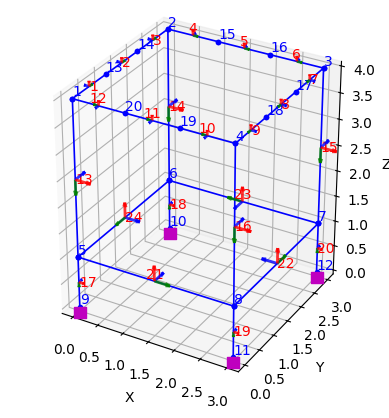

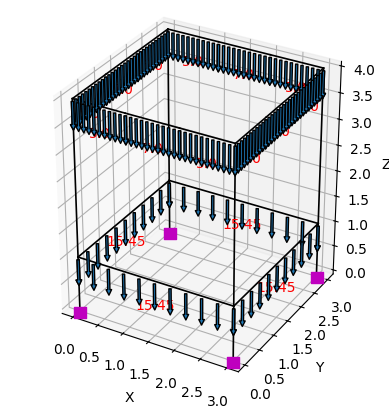

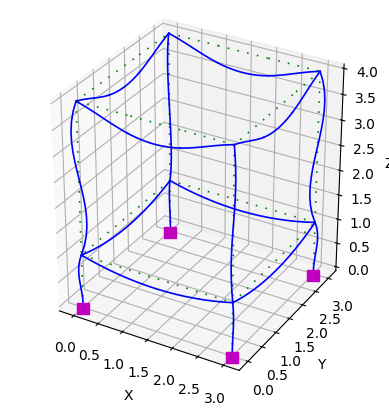

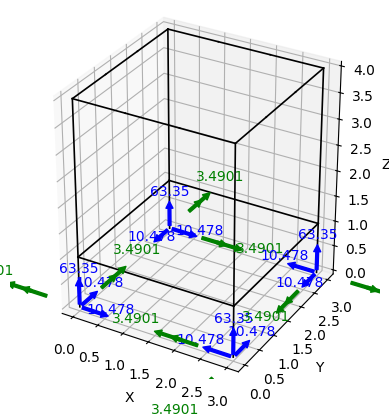

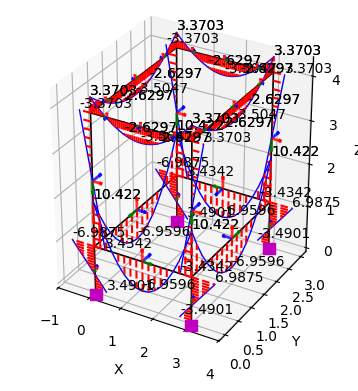

In [2]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Clear existing model
ops.wipe()
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D with 6 DOF per node

# -----------------------------
# Material and section properties
E = 210e9      # Young's modulus in Pa
A = 0.01       # Cross-sectional area in m^2
Iz = 1e-6      # Moment of inertia about z
Iy = 1e-6      # Moment of inertia about y
J = 1e-4       # Torsional constant
G = 81.2e9     # Shear modulus in Pa (assumed for steel)
transfTag = 1

# Define geometric transformation (linear)
ops.geomTransf("Linear", transfTag, 0, 0, 1)
ops.geomTransf("Linear", 2, 1, 0, 0)  # For vertical elements
# -----------------------------
# Node coordinates (you can expand this)
ops.node(1, 0.0, 0.0, 4.0)
ops.node(2, 0.0, 3.0, 4.0)
ops.node(3, 3.0, 3.0, 4.0)
ops.node(4, 3.0, 0.0, 4.0)
ops.node(5, 0.0, 0.0, 1.0)
ops.node(6, 0.0, 3.0, 1.0)
ops.node(7, 3.0, 3.0, 1.0)
ops.node(8, 3.0, 0.0, 1.0)
ops.node(9, 0.0, 0.0, 0.0)
ops.node(10, 0.0, 3.0, 0.0)
ops.node(11, 3.0, 0.0, 0.0)
ops.node(12, 3.0, 3.0, 0.0)
ops.node(13, 0.0, 1.0, 4.0)
ops.node(14, 0.0, 2.0, 4.0)
ops.node(15, 1.0, 3.0, 4.0)
ops.node(16, 2.0, 3.0, 4.0)
ops.node(17, 3.0, 2.0, 4.0)
ops.node(18, 3.0, 1.0, 4.0)
ops.node(19, 2.0, 0.0, 4.0)
ops.node(20, 1.0, 0.0, 4.0)
# Supports: node 1 fixed, node 2 pinned (allows rotation)
ops.fix(9, 1, 1, 1, 1, 1, 1)
ops.fix(10, 1, 1, 1, 1, 1, 1)
ops.fix(11, 1, 1, 1, 1, 1, 1)
ops.fix(12, 1, 1, 1, 1, 1, 1)


# -----------------------------
# Define element
ops.element("elasticBeamColumn", 1, 1, 13, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 2, 13, 14, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 3, 14, 2, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 4, 2, 15, A, E, G, J, Iy, Iz, transfTag) #
ops.element("elasticBeamColumn", 5, 15, 16, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 6, 16, 3, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 7, 3, 17, A, E, G, J, Iy, Iz, transfTag) #
ops.element("elasticBeamColumn", 8, 17, 18, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 9, 18, 4, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 10, 4, 19, A, E, G, J, Iy, Iz, transfTag) #
ops.element("elasticBeamColumn", 11, 19, 20, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 12, 20, 1, A, E, G, J, Iy, Iz, transfTag)

ops.element("elasticBeamColumn", 13, 1, 5, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 14, 2, 6, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 15, 3, 7, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 16, 4, 8, A, E, G, J, Iy, Iz, 2)

ops.element("elasticBeamColumn", 17, 5, 9, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 18, 6, 10, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 19, 8, 11, A, E, G, J, Iy, Iz, 2)
ops.element("elasticBeamColumn", 20, 7, 12, A, E, G, J, Iy, Iz, 2)

ops.element("elasticBeamColumn", 21, 5, 8, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 22, 8, 7, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 23, 7, 6, A, E, G, J, Iy, Iz, transfTag)
ops.element("elasticBeamColumn", 24, 6, 5, A, E, G, J, Iy, Iz, transfTag)

# -----------------------------
# Loading
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)

# Apply vertical point load at node 2
#ops.load(2, 0, -1000, 0, 0, 0, 0)  # Fx, Fy, Fz, Mx, My, Mz
ops.eleLoad('-ele', 21, '-type', '-beamUniform', 0.0, -15.45, 0.0)
ops.eleLoad('-ele', 22, '-type', '-beamUniform', 0.0, -15.45, 0.0)
ops.eleLoad('-ele', 23, '-type', '-beamUniform', 0.0, -15.45, 0.0)
ops.eleLoad('-ele', 24, '-type', '-beamUniform', 0.0, -15.45, 0.0)
#UVL
ops.eleLoad('-ele', 1, '-type', '-beamUniform', 0.0, -5.0, 0.0)
ops.eleLoad('-ele', 2, '-type', '-beamUniform', 0.0, -7.0, 0.0)
ops.eleLoad('-ele', 3, '-type', '-beamUniform', 0.0, -5.0, 0.0)

ops.eleLoad('-ele', 4, '-type', '-beamUniform', 0.0, -5.0, 0.0)
ops.eleLoad('-ele', 5, '-type', '-beamUniform', 0.0, -7.0, 0.0)
ops.eleLoad('-ele', 6, '-type', '-beamUniform', 0.0, -5.0, 0.0)

ops.eleLoad('-ele', 7, '-type', '-beamUniform', 0.0, -5.0, 0.0)
ops.eleLoad('-ele', 8, '-type', '-beamUniform', 0.0, -7.0, 0.0)
ops.eleLoad('-ele', 9, '-type', '-beamUniform', 0.0, -5.0, 0.0)

ops.eleLoad('-ele', 10, '-type', '-beamUniform', 0.0, -5.0, 0.0)
ops.eleLoad('-ele', 11, '-type', '-beamUniform', 0.0, -7.0, 0.0)
ops.eleLoad('-ele', 12, '-type', '-beamUniform', 0.0, -5.0, 0.0)

# -----------------------------
# Analysis setup
ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Plain")
ops.integrator("LoadControl", 1.0)
ops.algorithm("Linear")
ops.analysis("Static")
ops.analyze(1)
print(ops.nodeDisp(1))
# -----------------------------
# Visualization
opsv.plot_model()
opsv.plot_load()
opsv.plot_defo()
opsv.plot_reactions()
opsv.section_force_diagram_3d(
    sf_type='My',  # Try 'My' or 'Mz' depending on your frame direction
    sfac=1e-1,
    nep=17,
    fmt_secforce1={'color': 'blue', 'linewidth': 1},
    fmt_secforce2={'color': 'red', 'linestyle': '--'},
    end_max_values=True,
    node_supports=True,
    dir_plt=0,
)